In [1]:
a = "hello world!!"

In [2]:
print(a)

hello world!!


In [3]:
import numpy as np 
import pandas as pd
import os


lista = []

import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        lista.append(os.path.join(dirname, filename))

In [4]:
dfs = [pd.read_csv(item) for item in lista]

df = pd.concat(dfs)

In [5]:
df

,Film,Year,Script Type,Rotten Tomatoes critics,Metacritic critics,Average critics,Rotten Tomatoes Audience,Metacritic Audience,Rotten Tomatoes vs Metacritic deviance,Average audience,...,"financial source, if not The numbers",Genres,Opening Weekend ($),% of Gross earned abroad,Budget recovered,Budget recovered opening weekend,Film list here: https://www.boxofficemojo.com/year/2019/?ref_=bo_yl_table_5,Film list here: https://www.boxofficemojo.com/year/2020/?grossesOption=calendarGrosses,Film list here: https://www.boxofficemojo.com/year/2021/,film list here https://www.boxofficemojo.com/year/2022/
0,300,2007,adaptation,60,51,56,89.0,71,18,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3:10 to Yuma,2007,remake,88,76,82,86.0,73,13,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30 Days of Night,2007,adaptation,50,53,52,56.0,65,-9,61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Across the Universe,2007,original screenplay,54,56,55,82.0,73,9,78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alien vs. Predator - Requiem,2007,sequel,14,29,22,31.0,45,-14,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Uncharted,2022,NaN,41,45,43,90.0,62,28,76,...,NaN,adventure,44010155,62.90%,333.91%,36.68%,NaN,NaN,NaN,NaN
88,Vengeance,2022,NaN,81,65,73,86.0,64,22,75,...,NaN,"music, mystery, thriller",1755325,2.32%,-,-,NaN,NaN,NaN,NaN
89,Violent Night,2022,NaN,73,55,64,88.0,66,22,77,...,NaN,holiday,13450240,34.65%,383.00%,67.25%,NaN,NaN,NaN,NaN
90,Where the Crawdads Sing,2022,NaN,35,43,39,96.0,65,31,81,...,NaN,"drama, mystery, thriller",17253227,33.92%,568.91%,71.89%,NaN,NaN,NaN,NaN


In [6]:
df = df[['Year', 'Script Type', 'Rotten Tomatoes  critics', 'Metacritic Audience ','Metacritic critics', 'Average audience ', 'Worldwide Gross ($million)', 'Budget ($million)', 'Primary Genre' ]]

KeyError: "['Metacritic critics'] not in index"

In [ ]:
df

,Year,Script Type,Rotten Tomatoes critics,Metacritic Audience,Average audience,Worldwide Gross ($million),Budget ($million),Primary Genre
0,2007,adaptation,60,71,80,456,65,action
1,2007,remake,88,73,80,70,50,western
2,2007,adaptation,50,65,61,75,32,horror
3,2007,original screenplay,54,73,78,29,45,musical
4,2007,sequel,14,45,38,129,40,sci-fi
...,...,...,...,...,...,...,...,...
87,2022,NaN,41,62,76,400.7,120.0,action
88,2022,NaN,81,64,75,4.4,-,comedy
89,2022,NaN,73,66,77,76.6,20.0,action
90,2022,NaN,35,65,81,136.5,24.0,romance


In [ ]:
df['Script Type'].unique()

array(['adaptation', 'remake', 'original screenplay', 'sequel',
       'based on a true story', 'documentary', 'sequel, adaptation',
       'remake / reboot', 'remake / reboot, adaptation', 'sequel ',
       'based on a true story ', 'adaptation, remake / reboot',
       'original screenplay ', 'based on a true story, adaptation',
       'prequel', 'adaptation, based on a true story',
       'adaptation, sequel', 'semi-sequel',
       'based on a true story, remake', nan], dtype=object)

In [ ]:
col = df.columns.get_loc('Script Type')

df['Script Type'] = df['Script Type'].fillna('unknown')

for i in range(len(df)):
    value = df.iloc[i, col]

    if 'original screenplay' in value:
        value = 'original'
    elif 'sequel ' in value:
        value = 'sequel'
    elif 'true story' in value or 'true story' in value:
        value = 'real'
    elif 'remake' in value:
        value = 'remake'
    elif 'adaptation' in value:
        value = 'adaptation'
    elif 'prequel' in value:
        value = 'prequel'
    else:
        value = 'unknown'

    df.iloc[i, col] = value

df['Script Type'].unique()

C:\Users\disrct\AppData\Local\Temp\ipykernel_19296\725325619.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Script Type'] = df['Script Type'].fillna('unknown')


array(['adaptation', 'remake', 'original', 'unknown', 'real', 'sequel',
       'prequel'], dtype=object)

In [ ]:
df['Rotten Tomatoes  critics'].value_counts()

Rotten Tomatoes  critics
85    30
94    29
93    29
83    28
92    28
      ..
52     1
1      1
13     1
33     1
27     1
Name: count, Length: 190, dtype: int64

In [ ]:
df.isna().sum()

Year                             0
Script Type                      0
Rotten Tomatoes  critics         1
Metacritic Audience              0
Average audience                 1
Worldwide Gross ($million)       0
Budget ($million)                0
Primary Genre                 1689
dtype: int64

In [ ]:
coluna ='Rotten Tomatoes  critics'
df = df[df[coluna] != '-']
df[coluna].dropna(inplace=True)

df[coluna] = pd.to_numeric(df[coluna])

df[coluna].unique()

C:\Users\disrct\AppData\Local\Temp\ipykernel_19296\288302972.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coluna].dropna(inplace=True)
C:\Users\disrct\AppData\Local\Temp\ipykernel_19296\288302972.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coluna] = pd.to_numeric(df[coluna])


array([ 60.,  88.,  50.,  54.,  14.,  26.,  80.,  52.,  71.,  69.,  82.,
         1.,  67.,  27.,  93.,   2.,  23.,  35.,  28.,   3.,  92.,   4.,
        15.,  45.,  13.,  43.,  94.,  91.,   8.,  79.,  66.,  90.,  56.,
        36.,  63.,  49.,  31.,  29.,  95.,  39.,   9.,  70.,  21.,  11.,
        97.,  20.,  18.,  47.,  42.,  61.,  87.,  78.,  86.,  41.,  30.,
        19.,  72.,  33.,  57.,  46.,  55.,  89.,  75.,  96.,  64.,  77.,
        73.,  40.,  38.,  83.,  16.,  51.,  25.,  58.,  53.,  62.,   7.,
        34.,  24.,  32.,  48.,   5.,  85.,  65.,  68.,  22.,  37.,   0.,
        81.,  59.,  44.,  98.,  84.,  12.,  74.,  17.,   6.,  99.,  10.,
        76.,  nan, 100.])

In [ ]:
coluna ='Average audience '
df = df[df[coluna] != '-']
df[coluna].dropna(inplace=True)

df[coluna] = pd.to_numeric(df[coluna])

df[coluna].unique()

array([80. , 61. , 78. , 38. , 60. , 81. , 59. , 57. , 69. , 71. , 29. ,
       79. , 24. , 82. , 25. , 50. , 58. , 43. , 49. , 84. , 35. , 45. ,
       70. , 53. , 86. , 75. , 74. , 56. , 76. , 62. , 64. , 48. , 42. ,
       67. , 87. , 72. , 83. , 68. , 66. , 44. , 77. , 89. , 65. , 63. ,
       55. , 93. , 46. , 40. , 51. , 73. , 52. , 39. , 41. , 54. , 88. ,
       30. , 47. , 22. , 85. , 31. , 36. , 91. , 90. , 33. , 27. , 32. ,
       34. , 92. , 37. , 23. ,  7. , 66.5, 90.5, 85.5, 64.5, 77.5, 74.5,
       59.5, 79.5, 55.5, 63.5, 48.5, 69.5, 82.5, 73.5, 58.5, 40.5, 57.5,
       41.5, 72.5, 54.5, 47.5, 62.5, 80.5, 65.5, 67.5, 70.5, 75.5, 32.5,
       56.5, 81.5, 71.5, 33.5, 76.5, 86.5, 15.5, 52.5, 78.5, 46.5, 18.5,
       60.5, 51.5, 43.5, 61.5, 28. , 19. ,  nan,  5. ])

In [ ]:
coluna = 'Primary Genre'
df[coluna] = df[coluna].fillna('unknown')
df[coluna].value_counts()

Primary Genre
unknown      1682
action         68
drama          52
comedy         43
adventure      24
thriller       21
horror         20
crime          13
biography       8
animation       6
romance         6
musical         3
fantasy         3
western         2
sci-fi          2
mystery         1
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Primary Genre'] = le.fit_transform(df['Primary Genre'])

le2 = LabelEncoder()
df['Script Type'] = le2.fit_transform(df['Script Type'])

df

,Year,Script Type,Rotten Tomatoes critics,Metacritic Audience,Average audience,Worldwide Gross ($million),Budget ($million),Primary Genre
0,2007,0,60.0,71,80.0,456,65,0
1,2007,15,88.0,73,80.0,70,50,15
2,2007,8,50.0,65,61.0,75,32,8
3,2007,9,54.0,73,78.0,29,45,9
4,2007,12,14.0,45,38.0,129,40,12
...,...,...,...,...,...,...,...,...
87,2022,0,41.0,62,76.0,400.7,120.0,0
88,2022,4,81.0,64,75.0,4.4,-,4
89,2022,0,73.0,66,77.0,76.6,20.0,0
90,2022,11,35.0,65,81.0,136.5,24.0,11


Text(0, 0.5, 'movies')

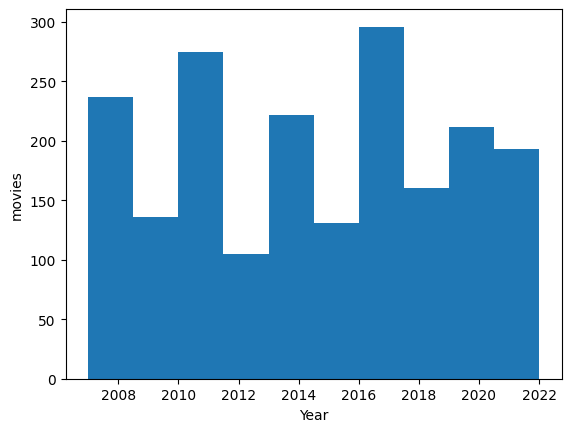

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

plt.hist(df["Year"])
plt.xlabel("Year")
plt.ylabel("movies")

KeyError: "None of [Index(['Rotten Tomatoes  critics', 'Metacritic  critics', 'Average audience '], dtype='object')] are in the [columns]"

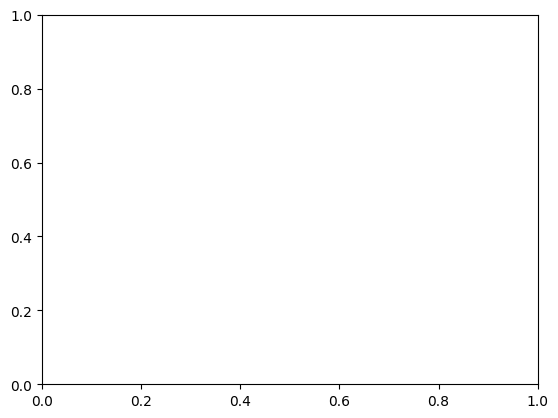

In [8]:
df.boxplot(column = ['Rotten Tomatoes  critics', 'Metacritic  critics', 'Average audience '])

In [9]:
df[ df['Worldwide Gross ($million)'] < 2000].plot.scatter(x = 'Average audience ', y = 'Worldwide Gross ($million)', s = 3)

TypeError: '<' not supported between instances of 'str' and 'int'